In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

print(os.listdir("./"))
# itme 与 id 映射关系
# 有几种类型的实体:
# jobid skillname FocusAreaDescription CertificationValue
# FreelancerID SkillName education experience CertificationValue   FocusAreaDescription  
# 他们的指向关系是什么
total_entity_df = pd.DataFrame()

['aggregator.py', 'data', 'data_loader.py', 'getexcel.py', 'get_data.ipynb', 'get_data2.ipynb', 'get_data3.ipynb', 'graph', 'graph.png', 'graph.xlsx', 'graph_edges', 'graph_model', 'KGCN copy.ipynb', 'KGCN.ipynb', 'model.py', 'node', 'node2vector.py', 'r2_copy.xlsx', 'README.md', 'show_umap.ipynb', 'test case.xlsx', 'test case_re.xlsx', '__pycache__']


In [12]:

# engagement_df = pd.read_excel("./data/Resume/shortlist and active engagement.xlsx",sheet_name="shortlists")

# freelancer_summary_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="freelancer summary")
# freelancer_summary_df["FreelancerID"]
# freelancer_summary_df["Designation"]
# freelancer_summary_df["City"]
# freelancer_summary_df["Title"]



# freelancer_freelancer_education_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="freelancer education")
# freelancer_freelancer_education_df["University"]
# freelancer_freelancer_education_df["MajorSubjects"]
# freelancer_freelancer_education_df["Qualification"]

# freelancer_freelancer_experience_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="freelancer experience")
# freelancer_freelancer_experience_df["Firm"]
# freelancer_freelancer_experience_df["Role"]


# freelancer_certification_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="certification")
# freelancer_certification_df["CertificationValue"]

# freelancer_focus_area_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="focus area")
# freelancer_focus_area_df["FocusAreaDescription"]


In [26]:
freelancer_freelancerskill_1_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="freelancerskill 1")
freelancer_freelancerskill_1_df["FreelancerID"]
freelancer_freelancerskill_1_df["SkillName"]


freelancer_freelancerskill_2_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="FreelancerSkill 2")
freelancer_freelancerskill_2_df["FreelancerID"]
freelancer_freelancerskill_2_df["SkillName"]

KeyboardInterrupt: 

In [3]:
jobs_summary_df = pd.read_excel("./data/Resume/jobs.xlsx",sheet_name="summary")
jobs_summary_df["jobid"]
jobs_summary_df["WorkLocationCity"]
jobs_job_skill_df = pd.read_excel("./data/Resume/jobs.xlsx",sheet_name="job skill")
jobs_job_skill_df["skillname"]

jobs_focus_area_df = pd.read_excel("./data/Resume/jobs.xlsx",sheet_name="focus area")
jobs_focus_area_df["FocusAreaDescription"]

jobs_certification_df = pd.read_excel("./data/Resume/jobs.xlsx",sheet_name="certification")
jobs_certification_df["CertificationValue"]

0       Oracle Certified Professional - Financial Apps...
1       None – preference given to those with professi...
2                                                     CPA
3                                                 actuary
4                                                     CPA
                              ...                        
1123                                Epic Beaker Certified
1124                                    Workday Certified
1125                                                 None
1126                                                 CISA
1127                                                CISSP
Name: CertificationValue, Length: 1128, dtype: object

In [40]:
# print(jobs_job_skill_df["skillname"].shape)
# jobs_job_skill_df_d = jobs_job_skill_df["skillname"].drop_duplicates()
# print(jobs_job_skill_df_d.shape)

# print(freelancer_freelancerskill_1_df["SkillName"].shape)
# freelancer_freelancerskill_1_df_d = freelancer_freelancerskill_1_df["SkillName"].drop_duplicates()
# print(freelancer_freelancerskill_1_df_d.shape)


# print(freelancer_freelancerskill_2_df["SkillName"].shape)
# freelancer_freelancerskill_2_df_d = freelancer_freelancerskill_1_df["SkillName"].drop_duplicates()
# print(freelancer_freelancerskill_2_df_d.shape)

# print(len(set(freelancer_freelancerskill_1_df_d)-set(freelancer_freelancerskill_2_df_d)))

# print(len(set(jobs_job_skill_df_d)-set(freelancer_freelancerskill_1_df_d)))

# print(jobs_job_skill_df_d)
# print()
# print(freelancer_freelancerskill_1_df_d)
# print()
# # print(set(jobs_job_skill_df_d)-set(freelancer_freelancerskill_1_df_d))

(45454,)
(5211,)
(1006206,)
(108933,)
(809900,)
(108933,)
0
1484
0        ABILITY TO ENSURE DETAILS ARE CONSISTENT ACROS...
2        ABILITY TO MAKE TOUGH DECISIONS AND DELIVER HA...
7        ABILITY TO NAVIGATE AND WORK EFFECTIVELY IN A ...
8        ABILITY TO QUICKLY PRIORITIZE THE NEEDS AND WA...
10          ABILITY TO READ AND UNDERSTAND GERMAN LANGUAGE
                               ...                        
45437                                                 WASA
45438                                    WEALTH MANAGEMENT
45448                                         WEB GRAPHICS
45449                                              WEBPACK
45452    WORKS WELL UNDER DEADLINES AND IS ABLE TO COLL...
Name: skillname, Length: 5211, dtype: object

0                  WORK CENTERS/RESOURCES
1              THE AREA OF QM MASTER DATA
2                           MAKE TO STOCK
3                        LOT SIZE METHODS
4                   SCHEDULING PARAMETERS
                        ...   

In [4]:
# job - skill
# freelancer - skill
# job - freelancer
# job - focus_area
# job_name - skill_name  
# "head_entity","head_entity_type","relation","relation_type","tail_entity","tail_entity_type"

job_name_dir = {}
job_list = list(zip(list(jobs_summary_df["jobid"]),list(jobs_summary_df["jobtitle"])))
job_dir = dict(job_list)

jobs_job_skill_df["jobtitle"] = jobs_job_skill_df["jobid"].map(job_dir)


# jobs_job_skill_df["skillname"]
df = pd.DataFrame()
df ["head_entity"] = jobs_job_skill_df["jobtitle"]
df ["head_entity_type"] = "j"

df ["relation"] = "j-s"
df ["relation_type"] = "j-s"

df ["tail_entity"] = jobs_job_skill_df["skillname"]
df ["tail_entity_type"] = "s"


In [5]:
df1 = pd.DataFrame()
freelancer_freelancerskill_1_df.columns

df1 ["head_entity"] = freelancer_freelancerskill_1_df["FreelancerID"]
df1 ["head_entity_type"] = "F"

df1 ["relation"] = "F-s"
df1 ["relation_type"] = "F-s"

df1 ["tail_entity"] = freelancer_freelancerskill_1_df["SkillName"]
df1 ["tail_entity_type"] = "s"
print(df1.shape)

df_d = df1.drop_duplicates()
print(df1.shape)

(1006206, 6)
(1006206, 6)


In [6]:
df2 = pd.DataFrame()
freelancer_freelancerskill_2_df.columns

df2 ["head_entity"] = freelancer_freelancerskill_2_df["FreelancerID"]
df2 ["head_entity_type"] = "F"

df2 ["relation"] = "F-s"
df2 ["relation_type"] = "F-s"

df2 ["tail_entity"] = freelancer_freelancerskill_2_df["SkillName"]
df2 ["tail_entity_type"] = "s"
df2.shape

(809900, 6)

In [10]:
df1_2 = pd.concat([df1,df2], axis=0)




In [11]:

jobs_shortlist_df_ = pd.read_excel("./data/Resume/shortlist and active engagement.xlsx",sheet_name="shortlists")
jobs_shortlist_df_["jobtitle"]  = jobs_shortlist_df_["jobid"].map(job_dir)

df3 = pd.DataFrame()
df3 ["head_entity"] = jobs_shortlist_df_["FreelancerID"]
df3 ["head_entity_type"] = "F"

df3 ["relation"] = "F-j"
df3 ["relation_type"] = "F-j"

df3 ["tail_entity"] = jobs_shortlist_df_["jobtitle"]
df3 ["tail_entity_type"] = "j"


df3.shape

(10015, 6)

In [15]:
df5_drop_nan = pd.merge( df1_2,df3,on=["head_entity","head_entity"],how = "left")
df5_drop_nan = df5_drop_nan.dropna(axis  = 0)
print(df5_drop_nan.shape)
df5_drop_nan_drop_d = df5_drop_nan.drop_duplicates()
print(df5_drop_nan_drop_d.shape)
print(df5_drop_nan_drop_d)


(431013, 11)
(364918, 11)
        head_entity head_entity_type_x relation_x relation_type_x  \
0             30089                  F        F-s             F-s   
1             30089                  F        F-s             F-s   
2             30089                  F        F-s             F-s   
3             30089                  F        F-s             F-s   
4             30089                  F        F-s             F-s   
...             ...                ...        ...             ...   
1981985      206210                  F        F-s             F-s   
1981988      206210                  F        F-s             F-s   
1981991      206210                  F        F-s             F-s   
1981994      206210                  F        F-s             F-s   
1981997      206210                  F        F-s             F-s   

                                         tail_entity_x tail_entity_type_x  \
0                               WORK CENTERS/RESOURCES              

In [17]:
df5_drop_nan_drop_d.columns

Index(['head_entity', 'head_entity_type_x', 'relation_x', 'relation_type_x',
       'tail_entity_x', 'tail_entity_type_x', 'head_entity_type_y',
       'relation_y', 'relation_type_y', 'tail_entity_y', 'tail_entity_type_y'],
      dtype='object')

In [24]:
df5_drop_nan_drop_d_ = pd.DataFrame()

df5_drop_nan_drop_d_["head_entity"] = df5_drop_nan_drop_d["head_entity"]
df5_drop_nan_drop_d_["head_entity_type"] = df5_drop_nan_drop_d["head_entity_type_x"]
df5_drop_nan_drop_d_["relation"] = df5_drop_nan_drop_d["relation_x"] 
df5_drop_nan_drop_d_["relation_type"] = df5_drop_nan_drop_d["relation_type_x"]
df5_drop_nan_drop_d_["tail_entity"] = df5_drop_nan_drop_d["tail_entity_x"]
df5_drop_nan_drop_d_["tail_entity_type"] = df5_drop_nan_drop_d["tail_entity_type_x"]

NameError: name 'df5_drop_nan_drop_d' is not defined

In [21]:
total_df = pd.concat([df,df5_drop_nan_drop_d_,df3
], axis=0)

total_df.shape

(420387, 6)

In [23]:
total_df.to_excel("graph.xlsx")

c:\Users\wyang120\Miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


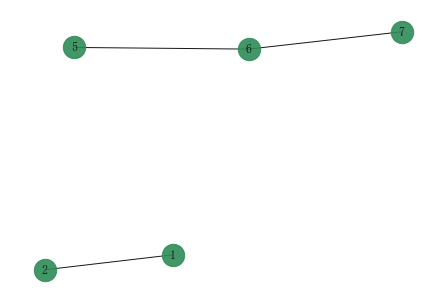

In [5]:
import networkx as nx
from node2vec import Node2Vec
import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])

        G.add_edge(triple[0], triple[1])


    pos = nx.spring_layout(G)
    
    #font = FontProperties(fname="SimHei.ttf", size=14)  # 步骤二
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()}, font_family='SimSun')
    plt.axis('off')
    
    #plt.legend(prop=font)
    plt.show()
triples = [[1,2],[5,6],[6,7]]
printGraph(triples)



In [2]:
total_df_ = pd.read_excel("graph.xlsx")
total_df_ = total_df_.loc[:,["head_entity","head_entity_type","tail_entity","tail_entity_type"]]



In [3]:
total_df_ ["head_entity"] = total_df_ ["head_entity"].astype("str")+"_"+total_df_ ["head_entity_type"]+"_"+"<#>"
total_df_ ["tail_entity"] = total_df_ ["tail_entity"].astype("str")+"_"+total_df_ ["tail_entity_type"]+"_"+"<#>"

In [8]:
print(total_df_)

                                   head_entity head_entity_type  \
0       Content Archetype Builder/Tester_j_<#>                j   
1                         Archetype Lead_j_<#>                j   
2                           Scrum Master_j_<#>                j   
3                           Scrum Master_j_<#>                j   
4                           Scrum Master_j_<#>                j   
...                                        ...              ...   
420382                            205307_F_<#>                F   
420383                            205307_F_<#>                F   
420384                            205307_F_<#>                F   
420385                            205307_F_<#>                F   
420386                            209704_F_<#>                F   

                                              tail_entity tail_entity_type  
0       ABILITY TO ENSURE DETAILS ARE CONSISTENT ACROS...                s  
1       ABILITY TO ENSURE DETAILS ARE CON

In [21]:
print(dir(total_df_.loc[0,["head_entity"]]))
print(total_df_.loc[0,["head_entity"]].values[0])
print(total_df_.loc[0,["head_entity"]].to_string())

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '

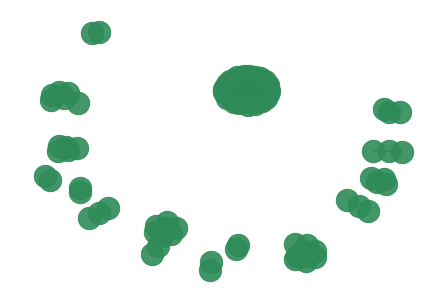

In [24]:
def printGraph(df):
    G = nx.Graph()
    
    for row_index in range(total_df_.shape[0]):

        n1,n2 = total_df_.loc[row_index,["head_entity"]].values[0],total_df_.loc[row_index,["tail_entity"]].values[0]
        G.add_node(n1)
        G.add_node(n2)


        G.add_edge(n1,n2)
        if row_index>100:
            break


    pos = nx.spring_layout(G)
    
    #font = FontProperties(fname="SimHei.ttf", size=14)  # 步骤二
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
             font_family='SimSun')
            #labels={node: node for node in G.nodes()}, font_family='SimSun')
    plt.axis('off')
    
    #plt.legend(prop=font)
    plt.show()
    return G

G = printGraph(total_df_)   

In [25]:

def plot_net(nx_G, pos, node_labels, node_color=[[.7, .7, .7]]):

    nx.draw(nx_G, pos, labels=node_labels,
            with_labels=True, node_color=node_color)
    # nx.draw_networkx_labels(nx_G,pos,node_labels)
    plt.show()
    plt.savefig('graph.png')



def get_graph_from_txt(file_name):
    node_index = []
    node_feature = []
    with open(file_name, "r") as txt:
        lines = txt.readlines()
        for line in lines[1:]:
            #print(line[:-1].split())
            label, feature = line[:-1].split("<#>")[0], line[:-1].split("<#>")[1]
            ##node_index .append(int(label))
            #print(label)
            node_index .append(label)
            #print(feature)
            feature = [x for x in feature.split(" ") if x!=""]
            node_feature.append(list(map(lambda x: float(x), feature)))
    return dict(list(zip(node_index, node_feature)))


def node2vec_run(graph):
    # Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
    node2vec = Node2Vec(graph, dimensions=32, walk_length=30,
                        num_walks=200, workers=4)  # Use temp_folder for big graphs

    # Embed nodes
    # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)

    # Look for most similar nodes
    ##model.wv.most_similar('ANTI MONEY LAUNDERING')  # Output node names are always strings

    # Save embeddings for later use
    EMBEDDING_FILENAME = "graph"
    model.wv.save_word2vec_format(EMBEDDING_FILENAME)

    EMBEDDING_MODEL_FILENAME = "graph_model"
    model.save(EMBEDDING_MODEL_FILENAME)

    # Embed edges using Hadamard method
    from node2vec.edges import HadamardEmbedder

    edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

    # Look for embeddings on the fly - here we pass normal tuples
    #edges_embs[('1', '2')]
    
    ''' OUTPUT
    array([ 5.75068220e-03, -1.10937878e-02,  3.76693785e-01,  2.69105062e-02,
        ... ... ....
        ..................................................................],
        dtype=float32)
    '''

    # Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
    edges_kv = edges_embs.as_keyed_vectors()

    # Look for most similar edges - this time tuples must be sorted and as str
    #edges_kv.most_similar(str(('1', '2')))
    EDGES_EMBEDDING_FILENAME = "graph_edges"
    # Save embeddings for later use
    edges_kv.save_word2vec_format(EDGES_EMBEDDING_FILENAME)




def graph_cluster(graph):
    #node2vec_run(graph)
    pos = get_graph_from_txt("graph")
    pos = sorted(pos.items(), key=lambda x: x[0])
    features = list(map(lambda x: x[1], pos))
    features = np.array(features)
    reducer = umap.UMAP(random_state=42)
    #umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3,
                        #n_components=3).fit_transform(df[feat_cols][:6000].values)
    embedding = reducer.fit_transform(features)
    pos = list(zip(list(range(len(embedding))), embedding))
    pos = dict(pos)
    node_labels = dict([(i, i) for i in graph.nodes()])
    #plot_net(graph, pos, node_labels)

In [26]:
graph = G
pos = nx.kamada_kawai_layout(graph)
node_labels = dict([(i, i) for i in graph.nodes()])
# plot_net(graph, pos, node_labels)
node2vec_run(graph)
# graph_cluster(graph)

Computing transition probabilities: 100%|██████████| 101/101 [00:00<00:00, 7810.19it/s]
Generating edge features: 100%|██████████| 5151/5151.0 [00:00<00:00, 117168.10it/s]


                              FocusAreaDescription  FocusAreaCount
0                                            Adobe             244
1                           Application Technology           10437
2                                            Audit            1547
3                                Change Management            2884
4                   Cloud Computing and Networking            1973
5                                         Customer            4324
6               Cybersecurity, Privacy & Forensics            7433
7                               Data and Analytics            5076
8                               Finance Operations            9622
9                                 Financial Crimes            7129
10            Financial Services Risk & Regulatory            4615
11                                       Guidewire             724
12                   HR & Workforce Transformation            1409
13  Health Industries Advisory Risk and Regulatory            

<AxesSubplot:>

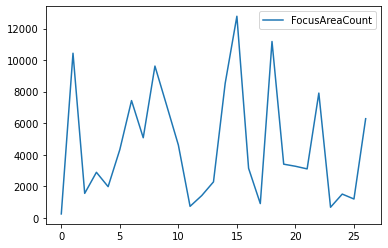

In [13]:
df = pd.DataFrame()
df = freelancer_focus_area_df.loc[:,['FocusAreaDescription']]

df_count = df.groupby(['FocusAreaDescription']).value_counts()
df_count  = df_count.reset_index(name= 'FocusAreaCount') 
print(df_count)

# df_count['FocusAreaCount'].plot(bins=28, kind='hist') 

df_count.plot()

0       Oracle Certified Professional - Financial Apps...
1       None – preference given to those with professi...
2                                                     CPA
3                                                 actuary
4                                                     CPA
                              ...                        
1123                                Epic Beaker Certified
1124                                    Workday Certified
1125                                                 None
1126                                                 CISA
1127                                                CISSP
Name: CertificationValue, Length: 1128, dtype: object

In [4]:
#数据标签
jobs_shortlist_df = pd.read_excel("./data/Resume/shortlist and active engagement.xlsx",sheet_name="shortlists")
jobs_shortlist_df["FreelancerID"]
jobs_shortlist_df["jobid"]

0        10947
1        12057
2        19269
3        10822
4        12998
         ...  
10010    17956
10011    17528
10012    13004
10013    17038
10014    19444
Name: jobid, Length: 10015, dtype: int64

In [5]:
#所有的应聘者

print(freelancer_summary_df["FreelancerID"].count())
# print(freelancer_summary_df["FreelancerID"].drop_duplicates().count())
print(jobs_shortlist_df["FreelancerID"].count())
total_FreelancerID_df = pd.concat([freelancer_summary_df["FreelancerID"],
                             freelancer_freelancer_education_df["FreelancerID"],
                             freelancer_freelancer_experience_df["FreelancerID"],
                             freelancer_certification_df["FreelancerID"],
                             freelancer_focus_area_df["FreelancerID"],
                             jobs_shortlist_df["FreelancerID"]
                             ], axis=0)

print(total_FreelancerID_df.count())
total_FreelancerID_df["FreelancerID"] = total_FreelancerID_df.drop_duplicates()
print(total_FreelancerID_df["FreelancerID"] .count())
# total_entity_df
total_FreelancerID_df["FreelancerID"]  = total_FreelancerID_df["FreelancerID"].astype('str')
total_FreelancerID_df["FreelancerID"]  = total_FreelancerID_df["FreelancerID"]  +"_FreelancerID"
print(total_FreelancerID_df["FreelancerID"][63061:63069])


63026
10015
819386
63122
120541                                  212860_FreelancerID
120544                                  212861_FreelancerID
59881     n all structures. • Defined NEW Chart of accou...
76975     ent.   Merger & Acquisition Candidate Identifi...
108632    l Application Engine Programs. •      Customiz...
187979     & Module Data Diagrammer extensively in the a...
212915    arePoint, and the AHRA composite Web Applicati...
232284                                  214323_FreelancerID
Name: FreelancerID, dtype: object


In [6]:
freelancer_summary_df [freelancer_summary_df["FreelancerID"].astype('str').str.len() > 20  ]

,FreelancerID,Designation,City,State,AverageRating,NumberOfPeopleRated,Summary,ResumeName,Title
1005,also the technical lead project manager on the...,50d3f5f7-2dab-4dbe-a561-91ed5561bd06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#所有的岗位

import string


print( jobs_shortlist_df["jobid"].count())
total_jobsID_df = pd.concat([jobs_summary_df["jobid"],
                             jobs_job_skill_df["jobid"],
                             jobs_focus_area_df["jobid"],
                             jobs_certification_df["jobid"],
                             jobs_shortlist_df["jobid"]
                             ], axis=0)
print(total_jobsID_df.count())
total_jobsID_df["jobid"] = total_jobsID_df.drop_duplicates()
print(total_jobsID_df["jobid"].count())
total_jobsID_df["jobid"] = total_jobsID_df["jobid"].astype('str')

total_jobsID_df["jobid"] = total_jobsID_df["jobid"]+"_jobid"
total_jobsID_df["jobid"]

10015
75411
8199


0          10_jobid
1          11_jobid
2          20_jobid
3          42_jobid
4          47_jobid
           ...     
8194    20804_jobid
8195    20805_jobid
8196    20806_jobid
8197    20807_jobid
8198    20808_jobid
Name: jobid, Length: 8199, dtype: object

In [8]:
#所有的领域

print(freelancer_focus_area_df["FocusAreaDescription"].count())
print(freelancer_focus_area_df["FocusAreaDescription"].drop_duplicates().count())
print(freelancer_focus_area_df["FocusAreaDescription"].count())
print(jobs_focus_area_df["FocusAreaDescription"].drop_duplicates().count())


total_focus_area_df = pd.concat([
    freelancer_focus_area_df["FocusAreaDescription"],
    jobs_focus_area_df["FocusAreaDescription"]

], axis=0)

print(total_focus_area_df.count())
total_focus_area_df["FocusAreaDescription"]= total_focus_area_df.drop_duplicates()
print(total_focus_area_df["FocusAreaDescription"].count())
#total_focus_area_df["FocusAreaDescription"]
total_focus_area_df["FocusAreaDescription"] = total_focus_area_df["FocusAreaDescription"]+"_FocusAreaDescription"
total_focus_area_df["FocusAreaDescription"].head()


123537
27
123537
28
134152
28


0                Financial Crimes_FocusAreaDescription
1    Financial Services Risk & Regulatory_FocusArea...
2              Data and Analytics_FocusAreaDescription
3             Risk and Regulatory_FocusAreaDescription
4    Cybersecurity, Privacy & Forensics_FocusAreaDe...
Name: FocusAreaDescription, dtype: object

In [9]:
#所有的证书
print(freelancer_certification_df["CertificationValue"].count())

print(jobs_certification_df["CertificationValue"].count())



total_certification_df = pd.concat([
    freelancer_certification_df["CertificationValue"],
    jobs_certification_df["CertificationValue"]

], axis=0)

print(total_certification_df.count())
total_certification_df["CertificationValue"] = total_certification_df.drop_duplicates()
print(total_certification_df["CertificationValue"].count())
total_certification_df["CertificationValue"] = total_certification_df["CertificationValue"].astype('str')+"_CertificationValue"
total_certification_df["CertificationValue"].head()
#total_certification_df["CertificationValue"]

95703
1122
96825
53378


0                               CSC_CertificationValue
1                               CSA_CertificationValue
2    Certified Information System Security Professi...
3    Guidewire PolicyCenter 8.0 Functional Certific...
4    Guidewire BillingCenter 7.0 Technical Certific...
Name: CertificationValue, dtype: object

In [10]:
#所有的城市

print(freelancer_summary_df["City"].count())

print(jobs_summary_df["WorkLocationCity"].count())



total_City_df = pd.concat([
    freelancer_summary_df["City"],
    jobs_summary_df["WorkLocationCity"]

], axis=0)

print(total_City_df.count())
total_City_df["city"] = total_City_df.drop_duplicates()

total_City_df["city"] = total_City_df["city"].astype('str') + "_city"
print(total_City_df["city"].count())
print(total_City_df["city"].head())


46951
7314
54265
5191
0       Raleigh_city
1           nan_city
2       Fairfax_city
3    Piscataway_city
4         Olney_city
dtype: object


In [11]:
total_freelancer_experience_Role_df = freelancer_freelancer_experience_df["Role"]
print(total_freelancer_experience_Role_df.count())
total_freelancer_experience_Role_df["Role"] = total_freelancer_experience_Role_df.drop_duplicates()
print(total_freelancer_experience_Role_df["Role"] .count())


385693


C:\Users\wyang120\AppData\Local\Temp\ipykernel_48960\1190974232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_freelancer_experience_Role_df["Role"] = total_freelancer_experience_Role_df.drop_duplicates()


215611


In [20]:
total_entity_Series = pd.concat([
    total_FreelancerID_df["FreelancerID"],
    total_jobsID_df["jobid"],
    total_focus_area_df["FocusAreaDescription"],
    total_certification_df["CertificationValue"],
    total_City_df["city"] 
], axis=0)

total_entity_Series.count()
print(total_entity_Series.head())

total_entity_df = pd.DataFrame()
total_entity_df["entity"] = total_entity_Series

0    1_FreelancerID
1    2_FreelancerID
2    7_FreelancerID
3    8_FreelancerID
4    9_FreelancerID
dtype: object


In [21]:
# total_entity_df.drop_duplicates().count()
total_entity_df["new_index"] = list(range(total_entity_df["entity"].shape[0]))
total_entity_df = total_entity_df.set_index("new_index")
total_entity_df.head()

,entity
new_index,
0,1_FreelancerID
1,2_FreelancerID
2,7_FreelancerID
3,8_FreelancerID
4,9_FreelancerID


In [23]:
total_entity_df_ = total_entity_df.set_index("entity")
total_entity_df_["new_index"] = list(range(total_entity_df["entity"].shape[0]))
total_entity_df_.head()

,new_index
entity,
1_FreelancerID,0
2_FreelancerID,1
7_FreelancerID,2
8_FreelancerID,3
9_FreelancerID,4


In [24]:
total_entity_df_.to_csv('./data/Resume/item_index2entity_id.txt',sep=' ')

In [14]:

total_entity_df.to_csv('./data/Resume/entity_id2item_index.txt',sep=' ')

In [226]:
entity_id2item_index  = pd.read_csv('./data/Resume/entity_id2item_index.txt',sep=' ')
entity_id2item_index_dir = {}
print(entity_id2item_index.shape[0])
for index in  range(entity_id2item_index.shape[0]):
    entity_id2item_index_dir[entity_id2item_index.iloc[index,0] ] =   entity_id2item_index.iloc[index,1]
    

129919


129919


In [3]:
entity_id2item_index  = pd.read_csv('./data/Resume/entity_id2item_index.txt',sep='\t')
item_index2entity_id_dir = {}
print(entity_id2item_index.shape[0])
for index in  range(entity_id2item_index.shape[0]):
    item_index2entity_id_dir[entity_id2item_index.iloc[index,1] ] =     entity_id2item_index.iloc[index,0]

129919


In [268]:
print(len(item_index2entity_id_dir.keys()))
print(item_index2entity_id_dir.get("Financial Crimes_FocusAreaDescription"))

129919
71321


In [232]:
#标签生成

jobs_shortlist_df_ = pd.read_excel("./data/Resume/shortlist and active engagement.xlsx",sheet_name="shortlists")
jobs_shortlist_df_["FreelancerID"] = jobs_shortlist_df_["FreelancerID"].astype('str') +"_FreelancerID"
jobs_shortlist_df_["jobid"] = jobs_shortlist_df_["jobid"].astype('str') +"_jobid"
print(jobs_shortlist_df_.head())
total_label =pd.DataFrame()
total_label["FreelancerID"] = jobs_shortlist_df_["FreelancerID"].map(item_index2entity_id_dir)
total_label["jobid"] = jobs_shortlist_df_["jobid"].map(item_index2entity_id_dir)
total_label["weight"] = 1
total_label.to_csv('./data/Resume/user_artists.dat',sep=' ',index = False)


          FreelancerID        jobid
0  179640_FreelancerID  10947_jobid
1  182649_FreelancerID  12057_jobid
2  204950_FreelancerID  19269_jobid
3  180213_FreelancerID  10822_jobid
4  180639_FreelancerID  12998_jobid


In [269]:
item_index2entity_id_dir["Financial Crimes_FocusAreaDescription"]

71321

In [284]:
#图谱生成

graph_focus_area_df = pd.DataFrame()

graph_focus_area_df["h"] = freelancer_focus_area_df["FreelancerID"].astype('str') +"_FreelancerID"
graph_focus_area_df["h"] = graph_focus_area_df["h"].map(item_index2entity_id_dir).astype('str')

graph_focus_area_df["r"] = "freelancer.FocusArea.FocusAreaDescription"


graph_focus_area_df["t"] = freelancer_focus_area_df["FocusAreaDescription"] .astype('str') +"_FocusAreaDescription"
graph_focus_area_df["t"] = graph_focus_area_df["t"] .map(item_index2entity_id_dir)


print(graph_focus_area_df.head())


graph_focus_area_df2 = pd.DataFrame()
graph_focus_area_df2["h"] = jobs_focus_area_df["jobid"].astype('str') +"_jobid"
graph_focus_area_df2["h"] = graph_focus_area_df2["h"].map(item_index2entity_id_dir).astype('str')

graph_focus_area_df2["r"] = "jobid.FocusArea.FocusAreaDescription"


graph_focus_area_df2["t"] = jobs_focus_area_df["FocusAreaDescription"] .astype('str') +"_FocusAreaDescription"
graph_focus_area_df2["t"] = graph_focus_area_df2["t"] .map(item_index2entity_id_dir)


print(graph_focus_area_df2.head())





   h                                          r      t
0  0  freelancer.FocusArea.FocusAreaDescription  71321
1  0  freelancer.FocusArea.FocusAreaDescription  71322
2  0  freelancer.FocusArea.FocusAreaDescription  71323
3  0  freelancer.FocusArea.FocusAreaDescription  71324
4  1  freelancer.FocusArea.FocusAreaDescription  71325
       h                                     r      t
0  63122  jobid.FocusArea.FocusAreaDescription  71327
1  63123  jobid.FocusArea.FocusAreaDescription  71327
2  63127  jobid.FocusArea.FocusAreaDescription  71327
3  63140  jobid.FocusArea.FocusAreaDescription  71327
4  63141  jobid.FocusArea.FocusAreaDescription  71327


In [285]:
#图谱生成



graph_focus_area_df3 = pd.DataFrame()

graph_focus_area_df3["h"] = freelancer_certification_df["FreelancerID"].astype('str') +"_FreelancerID"
graph_focus_area_df3["h"] = graph_focus_area_df3["h"].map(item_index2entity_id_dir).astype('str')

graph_focus_area_df3["r"] = "freelancer.Certification.CertificationValue"

graph_focus_area_df3["t"] = freelancer_certification_df["CertificationValue"] .astype('str') +"_CertificationValue"
graph_focus_area_df3["t"] = graph_focus_area_df3["t"] .map(item_index2entity_id_dir)


print(graph_focus_area_df3.head())



graph_focus_area_df4 = pd.DataFrame()
graph_focus_area_df4["h"] = jobs_certification_df["jobid"].astype('str') +"_jobid"
graph_focus_area_df4["h"] = graph_focus_area_df4["h"].map(item_index2entity_id_dir).astype('str')

graph_focus_area_df4["r"] = "jobid.Certification.CertificationValue"

graph_focus_area_df4["t"] = jobs_certification_df["CertificationValue"] .astype('str') +"_CertificationValue"
graph_focus_area_df4["t"] = graph_focus_area_df4["t"] .map(item_index2entity_id_dir)


print(graph_focus_area_df4.head())

   h                                            r      t
0  2  freelancer.Certification.CertificationValue  71349
1  2  freelancer.Certification.CertificationValue  71350
2  2  freelancer.Certification.CertificationValue  71351
3  3  freelancer.Certification.CertificationValue  71352
4  3  freelancer.Certification.CertificationValue  71353
       h                                       r       t
0  71202  jobid.Certification.CertificationValue  101774
1  71214  jobid.Certification.CertificationValue  124556
2  71264  jobid.Certification.CertificationValue   71435
3  69085  jobid.Certification.CertificationValue  124557
4  70175  jobid.Certification.CertificationValue   71435


In [354]:
df = pd.concat([graph_focus_area_df,graph_focus_area_df2,graph_focus_area_df3,graph_focus_area_df4], axis=0)
df.to_csv('./data/Resume/kg.txt',sep=' ',index = False)

In [12]:
# 缩小范围

jobs_shortlist_df = pd.read_excel("./data/Resume/shortlist and active engagement.xlsx",sheet_name="shortlists")
jobs_shortlist_df = jobs_shortlist_df["FreelancerID"].astype("str")+"_FreelancerID" 
entity_id_df = jobs_shortlist_df.map(item_index2entity_id_dir)
entity_id_df = list(entity_id_df)
#print(entity_id_df[:10])
entity_id_df = list(map(lambda x:str(x),entity_id_df))
# print(entity_id_df[:10])
# entity_id_df.head()
with open ('./data/Resume/kg.txt',"r") as kg:
    lines = kg.readlines()
print("finish")
with open('./data/Resume/kg1.txt',"w") as kg:
    for line in lines:
        if "freelancer" not in line:
            kg.writelines(line)
        if "freelancer"  in line and line.split(" ")[0] in list(entity_id_df):
            #print(line.split(" ")[0])
            kg.writelines(line)
   
print("end")

finish
end


<AxesSubplot:ylabel='Frequency'>

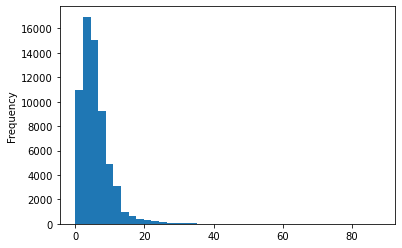

In [54]:
freelancer_summary_df['AverageRating'].plot(bins=40, kind='hist') 
#freelancer_summary_df[freelancer_summary_df["AverageRating"]>0]

In [68]:
freelancer_summary_df  = freelancer_summary_df.loc[:,["FreelancerID","Designation","City"]]


In [56]:
# freelancer_summary_freelancerskill_df1 = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="freelancerskill 1")
# freelancer_summary_freelancerskill_df2 = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="freelancerskill 2")
# freelancer_summary_freelancerskill_df = pd.concat([freelancer_summary_freelancerskill_df1,freelancer_summary_freelancerskill_df2])
# print(freelancer_summary_freelancerskill_df.count())
freelancer_summary_df.count()

FreelancerID    63026
Designation     28672
City            46951
dtype: int64

In [70]:
freelancer_summary_focus_area_df = pd.read_excel("./data/Resume/freelancers.xlsx",sheet_name="focus area")
#freelancer_summary_focus_area_df = freelancer_summary_focus_area_df.reindex(["FreelancerID"])
freelancer_summary_focus_area_df.count()

FreelancerID            123537
FocusAreaDescription    123537
dtype: int64

In [71]:
freelancer_df = pd.merge( freelancer_summary_df,freelancer_summary_focus_area_df,on=["FreelancerID"],how = "left")

In [72]:
freelancer_df.head()
freelancer_df.count()

FreelancerID            138978
Designation              69256
City                    104822
FocusAreaDescription    123329
dtype: int64

In [74]:
freelancer_df1 = freelancer_df.dropna(axis=0,subset=['FocusAreaDescription'])

In [75]:
freelancer_df1.count()

FreelancerID            123329
Designation              62773
City                     93123
FocusAreaDescription    123329
dtype: int64

In [77]:
freelancer_df1.head(100)

,FreelancerID,Designation,City,FocusAreaDescription
0,1,Financial Crimes Consultant,Raleigh,Financial Crimes
1,1,Financial Crimes Consultant,Raleigh,Financial Services Risk & Regulatory
2,1,Financial Crimes Consultant,Raleigh,Data and Analytics
3,1,Financial Crimes Consultant,Raleigh,Risk and Regulatory
4,2,Regulatory Compliance/Risk Analyst,NaN,"Cybersecurity, Privacy & Forensics"
...,...,...,...,...
147,118,Product Manager,Elkins Park,Guidewire
148,118,Product Manager,Elkins Park,Program and Portfolio Management
149,119,NaN,Anahelm,Guidewire
150,120,"Director/Senior Manager, Finance & Enterprise ...",Philadelphia,Finance Operations


In [331]:
#数据统计
#数据缺失情况
#数据错误分类
#哪些大类
#句子长度分析
#! /usr/bin/env python3
# -*- coding:utf-8 -*-

def LCS(x,y):
    import numpy as np
    c=np.zeros((len(x)+1,len(y)+1))
    b=np.zeros((len(x)+1,len(y)+1))
    for i in range(1,len(x)+1):
        for j in range(1,len(y)+1):
            if x[i-1]==y[j-1]:
                c[i,j]=c[i-1,j-1]+1
                b[i,j]=2
            else:
                if c[i-1,j]>=c[i,j-1]:
                    c[i,j]=c[i-1,j]
                    b[i,j]=1
                else:
                    c[i,j]=c[i,j-1]
                    b[i,j]=3
    return c,b

def getLCS(x,y):
    c,b=LCS(x,y)
    i=len(x)
    j=len(y)
    lcs=''
    while i>0 and j>0:
        if b[i][j]==2:
            lcs=x[i-1]+lcs
            i-=1
            j-=1
        if b[i][j]==1:
            i-=1
        if b[i][j]==3:
            j-=1
        if b[i][j]==0:
            break
    return lcs

print(getLCS("hello 1 world".split(" "),"hello world !".split(" ")))

helloworld


In [307]:
total_City_df["city"].head(10)

0        Raleigh_city
1            nan_city
2        Fairfax_city
3     Piscataway_city
4          Olney_city
5        Cypress_city
6        Atlanta_city
8      San Pedro_city
9        Gahanna_city
10       Phoenix_city
dtype: object

In [352]:
from pprint import pprint
total_City_df = total_City_df.astype("str")
for i in range(1000):
    for j in range(1000):
        #print("|",total_City_df.iloc[i],total_City_df.iloc[j],end = " ")
        u = getLCS(total_City_df.iloc[i].split(" "),total_City_df.iloc[j].split(" "))
        if total_City_df.iloc[i]!=total_City_df.iloc[j] and len(u)>3:
            print(  total_City_df.iloc[i],"-",total_City_df.iloc[j] ,"/" , getLCS(total_City_df.iloc[i].split(" "),total_City_df.iloc[j].split(" ")))
  


Columbia - District of Columbia / Columbia
Indian Head - Glen Head / Head
Arlington Heights - Cambria Heights / Heights
Arlington Heights - York town Heights / Heights
Arlington Heights - Cleveland Heights / Heights
Arlington Heights - Sterling Heights / Heights
Montgomery Village - Queens Village / Village
Montgomery Village - North Bay Village / Village
Montgomery Village - Elk Grove Village / Village
New York - New York City / NewYork
New York - New York City / NewYork
New York - West New York / NewYork
New York - York town Heights / York
New York - New York City / NewYork
Silver Spring - Spring Hill / Spring
New York - New York City / NewYork
New York - New York City / NewYork
New York - West New York / NewYork
New York - York town Heights / York
New York - New York City / NewYork
Cherry Hill - Spring Hill / Hill
Cherry Hill - Rocky Hill / Hill
North Bend - North Whales / North
North Bend - North Bergen / North
North Bend - North Brunswick / North
North Bend - North Bay Village / N

In [351]:
total_focus_area_df_drop_duplicates = total_focus_area_df["FocusAreaDescription"].drop_duplicates()

#total_focus_area_df_drop_duplicates.count()

#total_focus_area_df["FocusAreaDescription"] .plot(bins=28, kind='hist') 
c = total_focus_area_df.value_counts().sort_values(ascending=False)

c

Operations                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [25]:
import pandas as pd

In [145]:
import pandas as pd
import numpy as np
df = pd.read_excel("test case.xlsx")
df_columns = df.columns
for i in df_columns:
    df[i] = df[i].str.strip()
    df[i] = df[i].str.title()
df
df

,LW Make,LW Model,Updated Map
0,Ford,P1200,Step Van
1,Ford,P1200,Step Van
2,Chevrolet,5500Hd,Medium Duty
3,Chevrolet,Express 2500Hd,Van
4,Chevrolet,Silverado 6500Hd,Medium Duty
...,...,...,...
2508,Ford,Transit Connect,Light Duty
2509,Ford,Transit-250 Cargo,Cargo Van
2510,Ford,Transit-350,Car
2511,Ford,Transit-350 Cargo,Car


In [142]:
# df1 = df.groupby(['LW Make','LW Make']).value_counts().reset_index()
# df1

ValueError: cannot insert LW Make, already exists

In [155]:


df2 = df.groupby(['LW Make','LW Model']).value_counts()

df3  = df2.reset_index()   


In [152]:
df3

,LW Make,LW Model,Updated Map,0
0,16 Row Xlt Bar,"25"" Camso Tracks",Equipment,1
1,1929 Ford,Model T,Car,1
2,55' Terex,Tl50M,Equipment,1
3,7X20,14Kl,Equipment,1
4,8.5X24 Carry On,Enclosed Cargo Trailer,Equipment,1
...,...,...,...,...
2317,Yanmar,Vio 25 Open Canopy,Equipment,1
2318,Yanmar,Vio55-6A,Equipment,1
2319,York,Rtu,Equipment,1
2320,York,Rtu Hvac,Equipment,1


In [153]:
df3[0]

0       1
1       1
2       1
3       1
4       1
       ..
2317    1
2318    1
2319    1
2320    1
2321    1
Name: 0, Length: 2322, dtype: int64

In [17]:
df = pd.DataFrame([[1,2,3],
                   [1,2,3],
                   [1,2,3],
                   [1,2,4],
                   [1,2,4],
                   [5,6,7],
                   [5,6,8],
                   [7,8,9],
                   [8,9,10],
                   [8,9,10]
                          ],columns=["a","b","c"])
df

,a,b,c
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,4
4,1,2,4
5,5,6,7
6,5,6,8
7,7,8,9
8,8,9,10
9,8,9,10


In [18]:
df2 = df.groupby(['a','b','c']).value_counts()
df2  = df2.reset_index(name= 'Count1') 
# df2 = df2.rename({ 0: 'Count1'}, axis=1)
df3 = pd.merge( df,df2,on=["a","b","c"],how = "left")
df3

,a,b,c,Count1
0,1,2,3,3
1,1,2,3,3
2,1,2,3,3
3,1,2,4,2
4,1,2,4,2
5,5,6,7,1
6,5,6,8,1
7,7,8,9,1
8,8,9,10,2
9,8,9,10,2


In [213]:
#df3 = df3.drop_duplicates()

In [225]:
# df4 = df3.groupby(['a']).value_counts()
# np.nan

In [224]:
# df4 = df.groupby(['a']).value_counts()
# df4  

In [19]:
df4 = df.groupby(['a','b'])["c"].count()
df4 = df4.reset_index(name= 'Count2') 

df5 = pd.merge( df,df4,on=["a","b"],how = "left")
df5

,a,b,c,Count2
0,1,2,3,5
1,1,2,3,5
2,1,2,3,5
3,1,2,4,5
4,1,2,4,5
5,5,6,7,2
6,5,6,8,2
7,7,8,9,1
8,8,9,10,2
9,8,9,10,2


In [20]:
# df6 = pd.merge( df3,df5,on=["a","b","c"],how = "left")
# df6




df3["Count2"] = df5["Count2"]
df3

,a,b,c,Count1,Count2
0,1,2,3,3,5
1,1,2,3,3,5
2,1,2,3,3,5
3,1,2,4,2,5
4,1,2,4,2,5
5,5,6,7,1,2
6,5,6,8,1,2
7,7,8,9,1,1
8,8,9,10,2,2
9,8,9,10,2,2


In [21]:
df3["rank"]  = df3.groupby(["a","b","c"])["Count1"].rank(method='first')
df3

,a,b,c,Count1,Count2,rank
0,1,2,3,3,5,1.0
1,1,2,3,3,5,2.0
2,1,2,3,3,5,3.0
3,1,2,4,2,5,1.0
4,1,2,4,2,5,2.0
5,5,6,7,1,2,1.0
6,5,6,8,1,2,1.0
7,7,8,9,1,1,1.0
8,8,9,10,2,2,1.0
9,8,9,10,2,2,2.0


In [34]:
# def func(Count1,Count2,sortID):
#     if Count1==Count2 and sortID==1:
#         return "keep"
#     if Count1==Count2 and sortID>1:
#         return "del"
#     if Count2>Count1:
#         return "confirm"
# df[ (df.gender == 'male') & (df.age > 10) ]
df3["rank"] = df3["rank"].apply(lambda x:x+1)

In [35]:
df3

,a,b,c,Count1,Count2,rank
0,1,2,3,3,5,2.0
1,1,2,3,3,5,3.0
2,1,2,3,3,5,4.0
3,1,2,4,2,5,2.0
4,1,2,4,2,5,3.0
5,5,6,7,1,2,2.0
6,5,6,8,1,2,2.0
7,7,8,9,1,1,2.0
8,8,9,10,2,2,2.0
9,8,9,10,2,2,3.0


In [25]:
df3["item"]=df3[["Count1","Count2","sortID"]].apply( lambda x : x+1 ,axis=1)
df3

KeyError: "None of [Index(['sortID'], dtype='object')] are in the [columns]"

In [27]:
freelancer_df = pd.merge( freelancer_summary_df,freelancer_summary_focus_area_df,on=["FreelancerID"],how = "left")

NameError: name 'freelancer_summary_focus_area_df' is not defined

In [28]:
df = pd.DataFrame([1,2,3,4,np.nan])
df

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,NaN


In [26]:
df = df[0].map({1.0:1000})
df

KeyError: 0